# NBA Project 

#    Introduction to NBA

The National Basketball Association (NBA) is an American men's professional basketball league. It is composed of 30 teams (29 in the United States and 1 in Canada) and is one of the four major professional sports leagues in the United States and Canada. It is the premier men's professional basketball league in the world.

The league was founded in New York City on June 6, 1946, as the Basketball Association of America (BAA). It changed its name to the National Basketball Association on August 3, 1949, after merging with the competing National Basketball League (NBL)

#    Introduction to My Project

My final project is focused on the analysis of the whole data about pro players in the NBA. The topic that I chose is based on my personal interest since basketball is one of my most favorite sport games; also, the NBA team was selected for the analysis as it is the most famous basketball team in the sports world.

Initially, I was aiming to investigate the effect of the players’ height, weight and their origin on their sport abilities and in-game effectiveness. However, then I realised that in the modern world money is the key factor in any field, whether it concerns sports or other spheres, therefore I decided to focus on the salaries of the players. Thus, my aim is to investigate the impact of the salary of a player on their performance during games and their effectiveness in achieving high points and trophies for their teams. Based on this factor, I decided to search for the information recorded in the past years about the salary of the players who have been playing in the NBA as a pro player for several years, also correlating their income to their level of performance during games

#    Data Description

For the investigation I have found the dataset that was taken from Kaggle, the world’s largest data science community which provides access to many data sets, including the table which contains the whole information about the NBA players’ salaries in the period 2002 to 2017. The table presents information about the players’ names, teams, position and salary for the certain season, and the season itself. The information provided in the table also concerns the spending of money of a certain team on a player’s salary, seasons with the highest salaries, leading teams, the most paid positions and other details which allow me to answer all the stated above questions regarding the NBA players’ income.

# Research Question

To what extent does the salary of an NBA player affect their performance during the games?

Also, another factor that, I believe, should be considered is whether the position of the player on the court can affect their salary. For instance, the most known basketball players, such as Michael Jordan, James LeBron, Kobe Bryant, ets., are usually attackers and they take such positions as Small Forward (SF), Power Forward (PF) and Shooting Guard (SG) which are the attacking positions. Therefore, the next question which should be answered is:

How does a player’s position in the basketball game affect their salary?

Moreover, what I have noticed in the basketball world is that age might be another aspect which can influence the salary of a player. The fact is that the older the player is, the higher is their income. Thus, the question is:

To what extent is it true that the older and more experienced basketball players earn more than the new young players? If it is true, then why is it so?

It is also evident that the dollar price is rising each year so it would be pertinent to state the question:

Does the change of the dollar price affect the salary of the basketball players?

Lastly, it is known that the salaries of the NBA players are much higher than the income of an average individual, therefore my last question is:

Why are the salaries of the basketball players so high?

# Data Preparation and Analytics

In [11]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv('NBASalaryData03-17.csv')
df[:]

,team,salary,player,position,season
0,Minnesota Timberwolves,25200000.0,Kevin Garnett,PF,2002-2003
1,Portland Trail Blazers,13500000.0,Damon Stoudamire,PG,2002-2003
2,Seattle SuperSonics,13080000.0,Gary Payton,PG,2002-2003
3,Seattle SuperSonics,12375000.0,Ray Allen,SG,2002-2003
4,New York Knicks,12375000.0,Latrell Sprewell,SG,2002-2003
...,...,...,...,...,...
6250,Boston Celtics,44495.0,Jonathan Gibson,G,2017-2018
6251,Dallas Mavericks,31969.0,Pierre Jackson,PG,2017-2018
6252,Los Angeles Lakers,13824.0,Andre Ingram,G,2017-2018
6253,Orlando Magic,4608.0,Amile Jefferson,PF,2017-2018


Before we begin let's find some of the null values in in the dataframe. They are given by 'null Unknown'

In [13]:
df.replace("null Unknown", np.nan, inplace = True) #replacing the null values for np NaN

validation = pd.DataFrame() #checking for null values
validation['Columns'] = list(df.columns)
validation['Count'] = list(df.count())
validation[:]

,Columns,Count
0,team,6237
1,salary,6255
2,player,6255
3,position,6255
4,season,6255


So there is some null values in the data frame, let's just drop them.

In [14]:
df = df.dropna(axis=0) #droping null values
df.sort_values(by = ['salary'], ascending = False)

,team,salary,player,position,season
5792,Golden State Warriors,37457154.0,Stephen Curry,PG,2017-2018
5803,LA Clippers,32088932.0,Blake Griffin,PF,2017-2018
5814,Denver Nuggets,31269231.0,Paul Millsap,PF,2017-2018
5825,Toronto Raptors,31200000.0,Kyle Lowry,PG,2017-2018
5330,Cleveland Cavaliers,30963450.0,LeBron James,SF,2016-2017
...,...,...,...,...,...
6254,Houston Rockets,4608.0,Aaron Jackson,F,2017-2018
1777,New Jersey Nets,4533.0,Billy Thomas,SG,2007-2008
1776,Toronto Raptors,4533.0,Linton Johnson,PF,2007-2008
2604,Boston Celtics,2692.0,Oliver Lafayette,G,2009-2010


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6237 entries, 0 to 6254
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   team      6237 non-null   object 
 1   salary    6237 non-null   float64
 2   player    6237 non-null   object 
 3   position  6237 non-null   object 
 4   season    6237 non-null   object 
dtypes: float64(1), object(4)
memory usage: 292.4+ KB


Before proceeding to data visualization we need to change type of salary column to int.

In [16]:
df = df.astype({'salary' : 'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6237 entries, 0 to 6254
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   team      6237 non-null   object
 1   salary    6237 non-null   int32 
 2   player    6237 non-null   object
 3   position  6237 non-null   object
 4   season    6237 non-null   object
dtypes: int32(1), object(4)
memory usage: 268.0+ KB


In [17]:
df[:]

,team,salary,player,position,season
0,Minnesota Timberwolves,25200000,Kevin Garnett,PF,2002-2003
1,Portland Trail Blazers,13500000,Damon Stoudamire,PG,2002-2003
2,Seattle SuperSonics,13080000,Gary Payton,PG,2002-2003
3,Seattle SuperSonics,12375000,Ray Allen,SG,2002-2003
4,New York Knicks,12375000,Latrell Sprewell,SG,2002-2003
...,...,...,...,...,...
6250,Boston Celtics,44495,Jonathan Gibson,G,2017-2018
6251,Dallas Mavericks,31969,Pierre Jackson,PG,2017-2018
6252,Los Angeles Lakers,13824,Andre Ingram,G,2017-2018
6253,Orlando Magic,4608,Amile Jefferson,PF,2017-2018


    Data Visualization

##### Q1: How does a player’s position in the basketball game affect their salary?

For this case we will use a box plot grouped by position of the players.

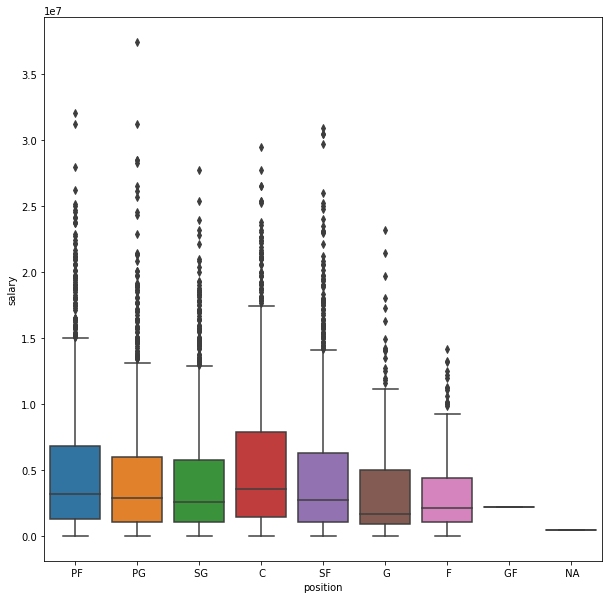

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (10,10) #dimensions of the plot
fig, ax = plt.subplots(figsize=fig_dims) #to increase size of the plot
fig = sns.boxplot(x="position", y="salary", data = df, ax=ax) #le7 = *10^7

Q1: How does a player’s position in the basketball game affect their salary?

The box plot gives information about the salaries of basketball players depending on their playing position. In general, the graph shows that the maximum salary differs for each playing position, and even in spite of the outliers it is possible to identify the most money making positions. 

Thus, the most profitable positions are Central (C), Power Forward (PF), Small Forward (SF) because it is shown on the graph that their maximum, 25th and 75th percentiles are the highest among all positions. The least money making positions are, although, Forward (F), Guard (G), Point Guard (PG), Shooting Guard (SG) for the same reason as it was mentioned before, but their maximum, 25th and 75th percentiles are the lowest. 

For instance, as it can be seen from the graph, position with the highest salaries is the central position (C); the reasons for this are multiple: the maximum for this position is equal to approximately 1.8 million dollars, as well as its 25th and 75th percentiles are nearly 0.2 and 0.7 millions respectively - these findings are all higher than for the other positions. It also means that the majority of basketball players who play on the central position earns higher salaries than players who take other positions. 

Although the graph also presents outliners, they are not considered as a trend since these are individual cases, i.e. these anomalies caused by top players who have a stable salary.

##### Q2: Which position is becoming more needed through years according to the salary, and why?

Before we begin we need to count different positions for each season

In [20]:
df2 = pd.DataFrame()
#lets create a partition by season and position, counting amount of players in that season
df2 = df[['season', 'position', 'player']].groupby(['season', 'position']).count() 
df2 = df2.rename(columns = {'player':'count'})

#resetting index to match the needs
df2.reset_index(level='position')

#turning position column to being separate columns
df2 =  df2.pivot_table('count', ['season'], 'position')
df2[:]

position,C,F,G,GF,NA,PF,PG,SF,SG
season,,,,,,,,,
2002-2003,58.0,10.0,13.0,NaN,NaN,62.0,42.0,41.0,37.0
2003-2004,38.0,2.0,2.0,NaN,NaN,40.0,30.0,33.0,28.0
2004-2005,30.0,2.0,1.0,NaN,NaN,27.0,15.0,19.0,16.0
2005-2006,88.0,7.0,7.0,1.0,NaN,80.0,81.0,66.0,70.0
2006-2007,86.0,9.0,7.0,NaN,NaN,89.0,74.0,69.0,80.0
2007-2008,88.0,8.0,12.0,NaN,1.0,81.0,74.0,71.0,81.0
2008-2009,88.0,9.0,13.0,NaN,NaN,74.0,71.0,73.0,77.0
2009-2010,84.0,10.0,16.0,NaN,NaN,76.0,72.0,82.0,78.0
2010-2011,89.0,16.0,17.0,NaN,NaN,75.0,77.0,85.0,84.0


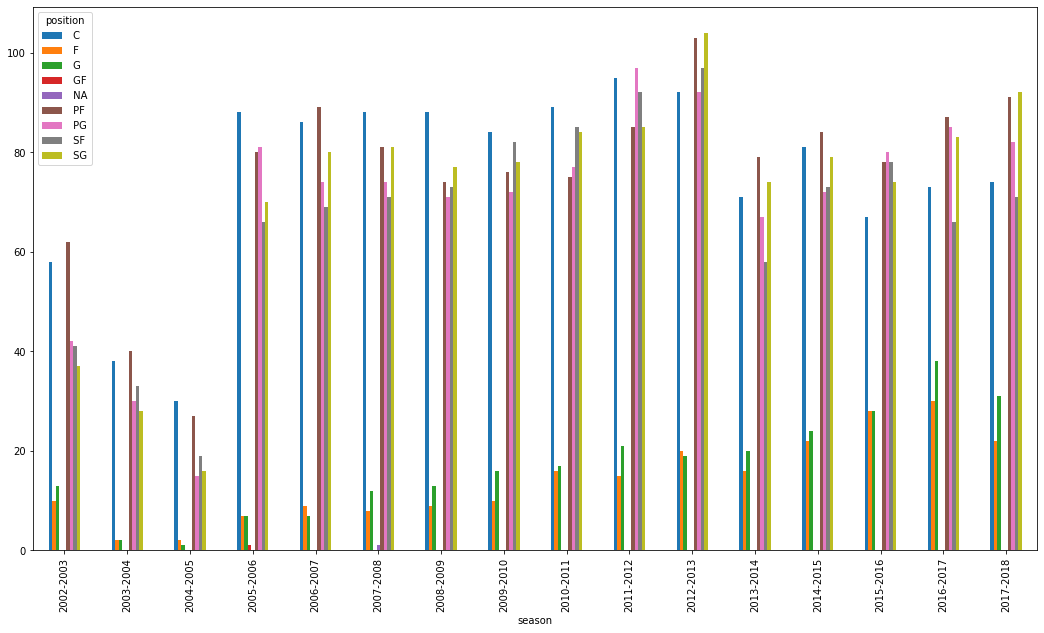

In [21]:
ax=df2.plot.bar(figsize=(18,10))

Q2: Which position is becoming more needed through years according to the salary, and why?

On this graph we can see that the Central position always remains being the most profitable position, even when the salary of each position is falling down, Central players keep earning more, so there is no big change during all years, however in the last 5 seasons (2012-2018) they stop being the most needed players. 

Moving on, Shooting Guards and Small forwards salaries kept growing (the reason for that is that the game plan started changing). Layups and dunks became harder to perform, and standing dunks became less effective in those seasons, so the NBA needed to have good paced players who can dribble and score triples, therefore Shooting Guards and Small Forwards positions appear to become more effective. Nevertheless, they stayed efficient and kept getting a good salary, however demand for those players was on its maximum in season 2012-2013, but later their salaries became as average as for other positions. 

Point Guards were also getting higher salaries after each season, and they had good growth in the 2005-2006 season, however then they had insignificant growth in salary till 2011-2012, and their salary falled in next 2 seasons, and kept insufficient growth. According to the graph we can understand that this position is more likely to be default and have no need to get more players on this position. 

Now, considering Shooting Guards who had unbelievable high growth in salary after the recession in seasons 2002-2005, they kept growing in the next seasons as well. Most known players such as Michael Jordan, James Harden, Kobe Bryant and others were playing on position Shooting Guard. So, in this graph we can exactly see how the Shooting Guard position became most popular and needed, but only according to the salaries. 


## Scraping Data

In [6]:
stats_by_year = pd.DataFrame()
years = [2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

In [7]:
for x in years:
    url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(x) # this is the HTML from the given URL
    html = urlopen(url)
    soup = BeautifulSoup(html)
    soup.findAll('tr', limit=2)# use getText()to extract the text we need into a list
    headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
    headers = headers[1:]
    rows = soup.findAll('tr')[1:]
    player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]
    stats = pd.DataFrame(player_stats, columns = headers)
    stats = stats.mask(stats.astype(object).eq('None')).dropna()
    stats['season'] = x
    stats['PTS'] = stats['PTS'].apply(lambda x: float(x))
    stats['TRB'] = stats['TRB'].apply(lambda x: float(x))
    stats['AST'] = stats['AST'].apply(lambda x: float(x))
    stats['STL'] = stats['STL'].apply(lambda x: float(x))
    stats['BLK'] = stats['BLK'].apply(lambda x: float(x))
    stats['FGA'] = stats['FGA'].apply(lambda x: float(x))
    stats['FG'] = stats['FG'].apply(lambda x: float(x))
    stats['FTA'] = stats['FTA'].apply(lambda x: float(x))
    stats['FT'] = stats['FT'].apply(lambda x: float(x))
    stats['TOV'] = stats['TOV'].apply(lambda x: float(x))
    stats['EFF'] = (stats['PTS']) + (stats['TRB']) + (stats['AST']) + (stats['STL']) + (stats['BLK']) - (((stats['FGA']) - (stats['FG'])) + ((stats['FTA']) - (stats['FT'])) + (stats['TOV']))  
    stats_by_year = pd.concat([stats_by_year,stats],ignore_index=True)

## Effectiveness formula: (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO)

### Complete scraped dataframe:

In [8]:
stats_by_year

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season,EFF
0,Tariq Abdul-Wahad,SG,28,DAL,14,0,14.6,1.9,4.1,.466,...,1.9,2.9,1.5,0.4,0.2,0.5,1.9,4.1,2003,6.2
1,Shareef Abdur-Rahim,PF,26,ATL,81,81,38.1,7.0,14.6,.478,...,6.2,8.4,3.0,1.1,0.5,2.6,3.0,19.9,2003,21.6
2,Courtney Alexander,PG,25,NOH,66,7,20.6,2.9,7.7,.382,...,1.2,1.8,1.2,0.5,0.1,1.0,1.9,7.9,2003,5.3
3,Malik Allen,PF,24,MIA,80,73,29.0,4.2,9.9,.424,...,3.6,5.3,0.7,0.5,1.0,1.6,2.9,9.6,2003,9.5
4,Ray Allen*,SG,27,TOT,76,75,37.9,7.9,17.9,.439,...,3.8,5.0,4.4,1.4,0.2,2.6,2.9,22.5,2003,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9330,Tyler Zeller,C,28,BRK,42,33,16.7,3.0,5.5,.546,...,3.1,4.6,0.7,0.2,0.5,0.8,1.9,7.1,2018,9.4
9331,Tyler Zeller,C,28,MIL,24,1,16.9,2.6,4.4,.590,...,2.7,4.6,0.8,0.3,0.6,0.5,2.0,5.9,2018,9.8
9332,Paul Zipser,SF,23,CHI,54,12,15.3,1.5,4.3,.346,...,2.2,2.4,0.9,0.4,0.3,0.8,1.6,4.0,2018,4.3
9333,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,.731,...,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7,2018,5.2


In [34]:
stats_by_year.groupby( by = 'Tm').agg({'Player':'count'})

,Player
Tm,
ATL,287
BOS,285
BRK,115
CHA,183
CHI,273
CHO,70
CLE,301
DAL,287
DEN,280


Dict to replace abbreviation with full team names

In [35]:
Team_ABBR = {
    'ATL' : 'Atlanta Hawks',
    'BOS' : 'Boston Celtics',
    'BRK' : 'Brooklyn Nets',
    'CHA' : 'Charlotte Hornets',
    'CHI' : 'Chicago Bulls',
    'CHO' : 'Charlotte Hornets',
    'CLE' : 'Cleveland Cavaliers',
    'DAL' : 'Dallas Mavericks',
    'DEN' : 'Denver Nuggets',
    'DET' : 'Detroit Pistons',
    'GSW' : 'Golden State Warriors',
    'HOU' : 'Houston Rockets',
    'IND' : 'Indiana Pacers',
    'LAC' : 'Los Angeles Clippers',
    'LAL' : 'Los Angeles Lakers',
    'MEM' : 'Memphis Grizzlies',
    'MIA' : 'Miami Heat',
    'MIL' : 'Milwaukee Bucks',
    'MIN' : 'Minnesota Timberwolves',
    'NJN' : 'Brooklyn Nets',
    'NOH' : 'New Orleans Pelicans',
    'NOK' : 'New Orleans Pelicans',
    'NOP' : 'New Orleans Pelicans',
    'NYK' : 'New York Knicks',
    'OKC' : 'Oklahoma City Thunder',
    'ORL' : 'Orlando Magic',
    'PHI' : 'Philadelphia 76ers',
    'PHO' : 'Phoenix Suns',
    'POR' : 'Portland Trail Blazers',
    'SAC' : 'Sacramento Kings',
    'SAS' : 'San Antonio Spurs',
    'SEA' : 'Oklahoma City Thunder',
    'TOR' : 'Toronto Raptors',    
    'UTA' : 'Utah Jazz',
    'WAS' : 'Washington Wizards',
    'TOT' : 'TOTAL'
}

replacing:

In [36]:
stats_by_year['Team'] = stats_by_year['Tm'].replace(Team_ABBR, regex=True)

#### Retrivieng players only for 2018 season 

In [40]:
stats_by_year2018 = stats_by_year.loc[stats_by_year['season'] == 2018]
stats_by_year2018

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,season,EFF,Team
8671,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,.395,...,1.5,0.4,0.5,0.1,0.3,1.7,4.7,2018,4.4,Oklahoma City Thunder
8672,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,.356,...,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2018,6.9,Brooklyn Nets
8673,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,.629,...,9.0,1.2,1.2,1.0,1.7,2.8,13.9,2018,19.4,Oklahoma City Thunder
8674,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,.512,...,5.5,1.5,0.5,0.6,1.0,2.0,6.9,2018,10.9,Miami Heat
8675,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,.401,...,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018,3.1,Orlando Magic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9330,Tyler Zeller,C,28,BRK,42,33,16.7,3.0,5.5,.546,...,4.6,0.7,0.2,0.5,0.8,1.9,7.1,2018,9.4,Brooklyn Nets
9331,Tyler Zeller,C,28,MIL,24,1,16.9,2.6,4.4,.590,...,4.6,0.8,0.3,0.6,0.5,2.0,5.9,2018,9.8,Milwaukee Bucks
9332,Paul Zipser,SF,23,CHI,54,12,15.3,1.5,4.3,.346,...,2.4,0.9,0.4,0.3,0.8,1.6,4.0,2018,4.3,Chicago Bulls
9333,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,.731,...,1.9,0.2,0.1,0.4,0.3,0.9,3.7,2018,5.2,Cleveland Cavaliers


#### Player salaries in 2017-2018 season:

In [42]:
player_salary_2018 = df.loc[df['season'] == '2017-2018']
player_salary_2018

,team,salary,player,position,season
5792,Golden State Warriors,37457154,Stephen Curry,PG,2017-2018
5793,Boston Celtics,27734406,Al Horford,C,2017-2018
5794,Oklahoma City Thunder,26243760,Carmelo Anthony,PF,2017-2018
5795,Portland Trail Blazers,26153057,Damian Lillard,PG,2017-2018
5796,Washington Wizards,26011913,Otto Porter Jr.,SF,2017-2018
...,...,...,...,...,...
6250,Boston Celtics,44495,Jonathan Gibson,G,2017-2018
6251,Dallas Mavericks,31969,Pierre Jackson,PG,2017-2018
6252,Los Angeles Lakers,13824,Andre Ingram,G,2017-2018
6253,Orlando Magic,4608,Amile Jefferson,PF,2017-2018


### Joining two datasets

In [44]:
merged_players_2018 = pd.merge(player_salary_2018,stats_by_year2018,how='left',left_on=['player','team'],right_on=['Player','Team'])

In [50]:
merged_players_2018 = merged_players_2018.loc[merged_players_2018['Player'].isna() == False]
merged_players_2018

,team,salary,player,position,season_x,Player,Pos,Age,Tm,G,...,TRB,AST,STL,BLK,TOV,PF,PTS,season_y,EFF,Team
0,Golden State Warriors,37457154,Stephen Curry,PG,2017-2018,Stephen Curry,PG,29,GSW,51,...,5.1,6.1,1.6,0.2,3.0,2.2,26.4,2018.0,27.5,Golden State Warriors
1,Boston Celtics,27734406,Al Horford,C,2017-2018,Al Horford,C,31,BOS,72,...,7.4,4.7,0.6,1.1,1.8,1.9,12.9,2018.0,19.1,Boston Celtics
2,Oklahoma City Thunder,26243760,Carmelo Anthony,PF,2017-2018,Carmelo Anthony,PF,33,OKC,78,...,5.8,1.3,0.6,0.6,1.3,2.5,16.2,2018.0,13.7,Oklahoma City Thunder
3,Portland Trail Blazers,26153057,Damian Lillard,PG,2017-2018,Damian Lillard,PG,27,POR,73,...,4.5,6.6,1.1,0.4,2.8,1.6,26.9,2018.0,25.2,Portland Trail Blazers
5,New Orleans Pelicans,25686667,Jrue Holiday,PG,2017-2018,Jrue Holiday,SG,27,NOP,81,...,4.5,6.0,1.5,0.8,2.6,2.5,19.0,2018.0,20.8,New Orleans Pelicans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Toronto Raptors,55296,Nigel Hayes,F,2017-2018,Nigel Hayes,SF,23,TOR,2,...,0.0,0.0,0.0,0.0,0.5,0.0,3.0,2018.0,2.5,Toronto Raptors
457,Utah Jazz,44495,David Stockton,G,2017-2018,David Stockton,PG,26,UTA,3,...,0.0,0.0,0.0,0.0,0.3,1.0,3.3,2018.0,2.7,Utah Jazz
458,Boston Celtics,44495,Jonathan Gibson,G,2017-2018,Jonathan Gibson,PG,30,BOS,4,...,0.8,1.0,0.0,0.0,0.8,1.3,8.5,2018.0,7.2,Boston Celtics
460,Los Angeles Lakers,13824,Andre Ingram,G,2017-2018,Andre Ingram,SG,32,LAL,2,...,3.0,3.5,1.5,1.5,1.5,1.5,12.0,2018.0,15.5,Los Angeles Lakers


Here two datasets (one with the general information about the player's position and another with the data according their salary) have been joined in order to have one dataset that includes all the known information about the player. The presented information then helps to analyse the dependence of a basketball player's salary on their position.

## Checking if the formula was correct:
James Harden is the best player in the 2018 season in my opinion

In [65]:
merged_players_2018.loc[merged_players_2018['Player'] == 'James Harden']

,team,salary,player,position,season_x,Player,Pos,Age,Tm,G,...,TRB,AST,STL,BLK,TOV,PF,PTS,season_y,EFF,Team
38,Houston Rockets,28299399,James Harden,PG,2017-2018,James Harden,SG,28,HOU,72,...,5.4,8.8,1.8,0.7,4.4,2.3,30.4,2018.0,30.2,Houston Rockets


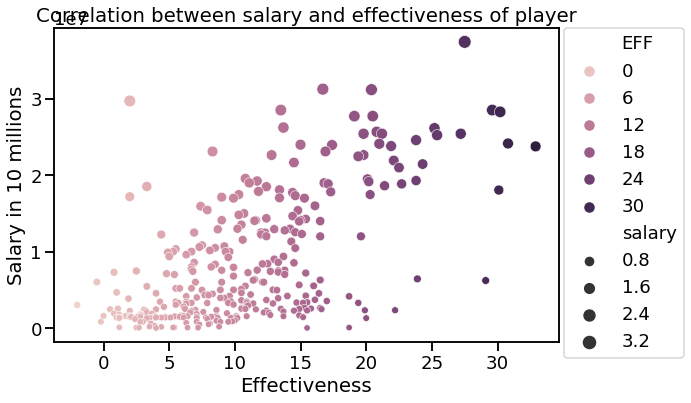

In [66]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_players_2018, x="EFF", y="salary",hue = "EFF",size = 'salary')
plt.xlabel("Effectiveness")
plt.ylabel("Salary in 10 millions")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Correlation between salary and effectiveness of player")
plt.tight_layout()
plt.savefig("place_legend_outside_plot_Seaborn_scatterplot.png",
                    format='png',dpi=150)

#### Q3: To what extent is salary of a player dependent on their effectiveness?

On the graph there is presented the relation between the effectiveness of a player and their salary (counting in 10 millions): the darker a dot, the higher is the effectiveness, and the larger a dot, the higher salary of a player.

In general, the more effective is a player, the higher is their salary, although other factors should be considered as well. For instance, a highly paid player can get injured during a season and be suspended for the rest of the season, simultaniously decreasing their effectiveness. Therefore, not all factors are considered, although the main trend can be still detected. 

The majority of players whose effectiveness is less than 17 units get paid no more than 20 millions dollars, and the higher their effectiveness, the higher possibility to earn more money. Considering the most paid players whose salary is higher than 2 millions, there is no defined trend for their effectiveness, so their salary depends not only on one factor of effectiveness, but on others as well. 

In [143]:
grouped_merged_players_2018 = merged_players_2018.groupby(by = 'Tm').agg({'salary':'mean'})
grouped_merged_players_2018 = grouped_merged_players_2018.sort_values(by = 'salary',ascending=True)


In [146]:
grouped_team_name = merged_players_2018.groupby(['team', 'Tm'],as_index=False).max()
grouped_team_name = grouped_team_name.loc[:, ['team','Tm']]
grouped_team_name.head(5)

,team,Tm
0,Atlanta Hawks,ATL
1,Boston Celtics,BOS
2,Brooklyn Nets,BRK
3,Charlotte Hornets,CHO
4,Chicago Bulls,CHI


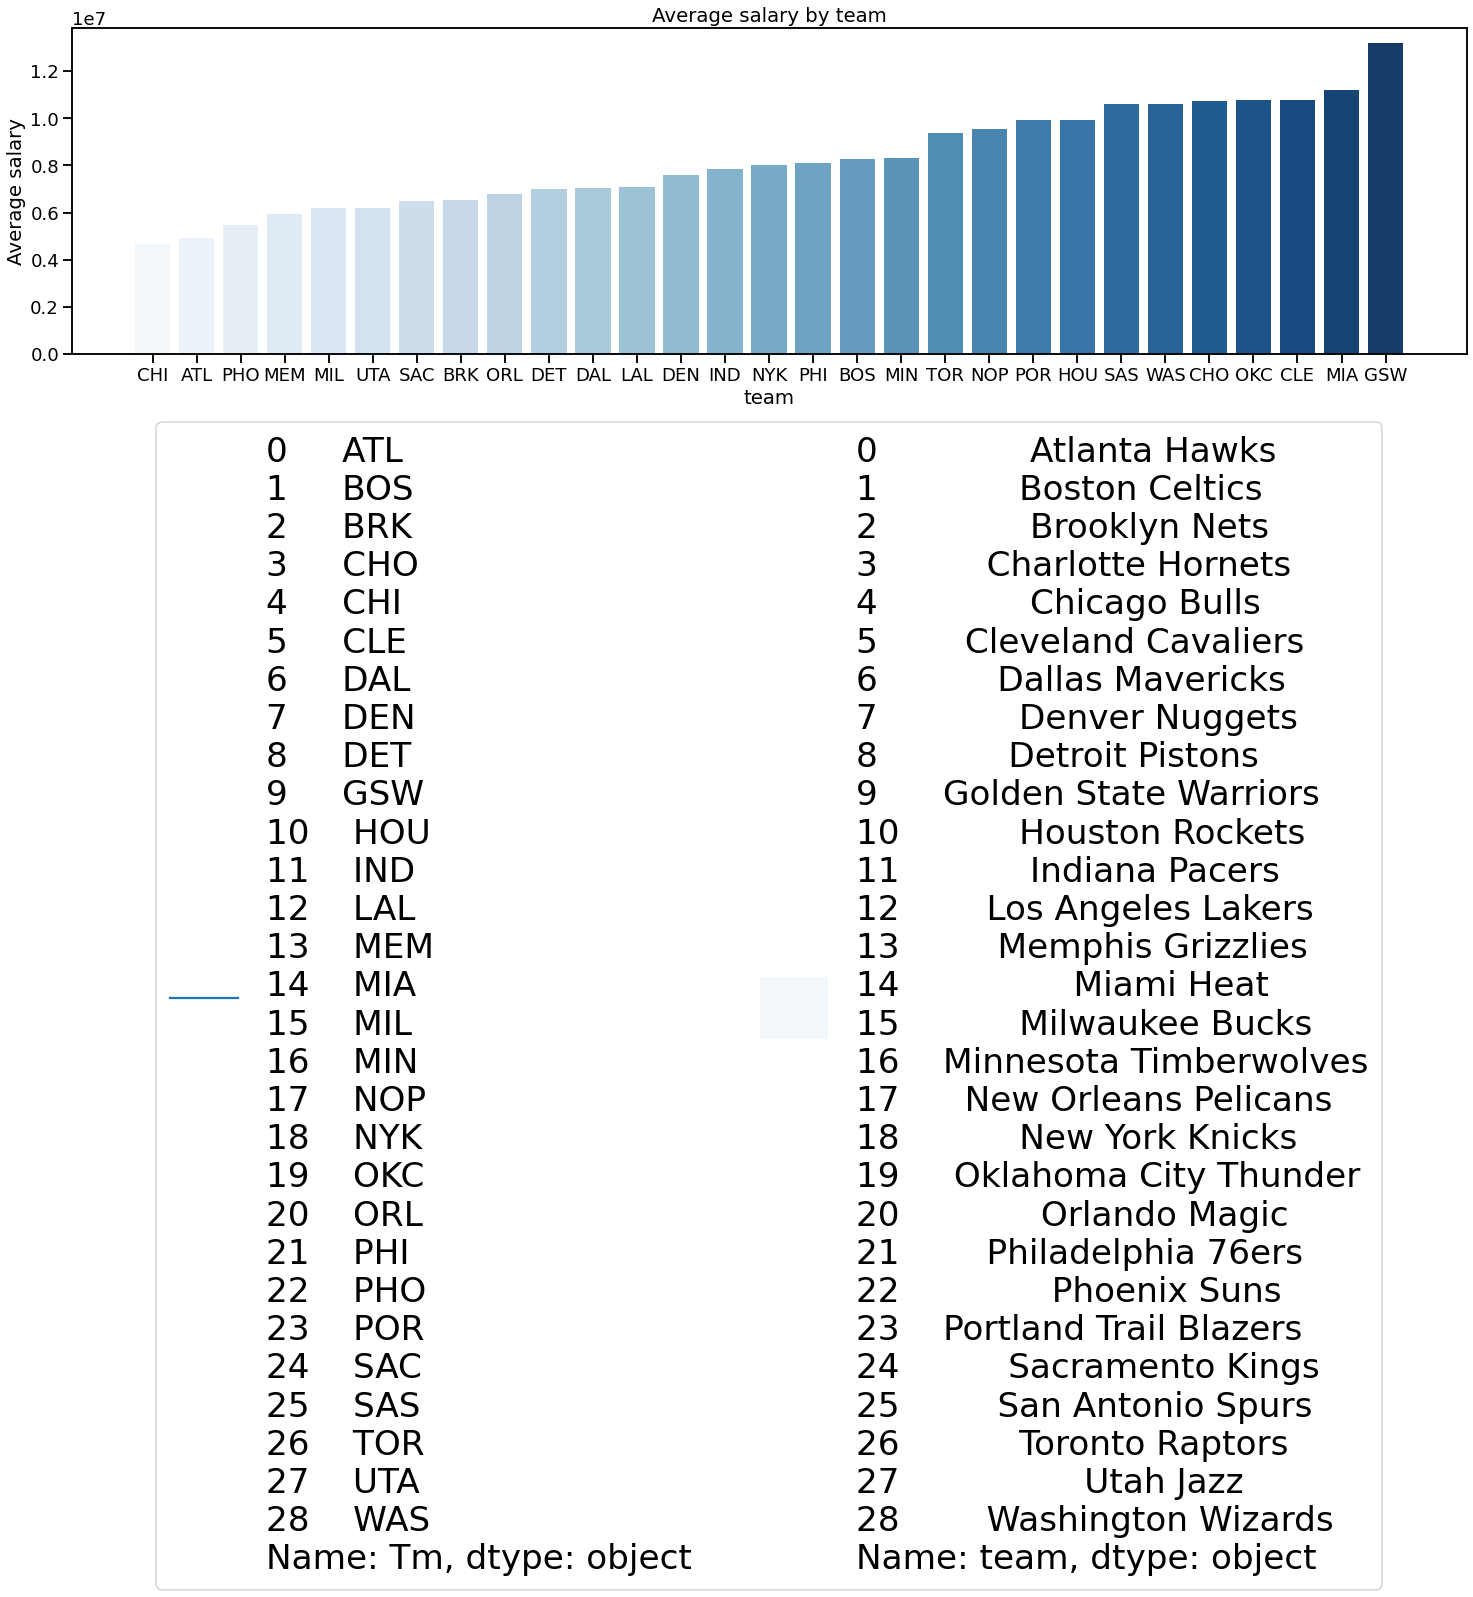

In [145]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(25,6))
sns.barplot(y="salary", x=grouped_merged_players_2018.index, data=grouped_merged_players_2018,label = grouped_team_name.team,palette="Blues")
plt.plot(1,label = grouped_team_name.Tm)
plt.xlabel("team")
plt.ylabel("Average salary")
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.05),borderaxespad=1.5,fontsize='xx-large', ncol=2,handleheight=2.4, labelspacing=0.05)
plt.title("Average salary by team")
plt.savefig("place_legend_outside_plot_Seaborn_scatterplot.png",
                    format='png',dpi=150)


#### Q4: How does the salary of a player depend on the team they play in?

The graph demonstrates the proportion of the average salary of players corresponding to the team they play in.

The lowest average salary is equal to nearly 4 millions and corresponds to the team 'Chicago Bulls', while the highest salary is over 12 millions dollars and belongs to the players who play for the team 'Golden State Warriors'. It can be clearly seen that the average salary increases corresponding to a team.

It can be concluded that the salary of a player clearly depends on the teams they play in.

In [154]:
grouped_by_age = merged_players_2018.groupby(by = 'Age',as_index=False).agg({'salary':'mean','EFF':'mean'})
grouped_by_age

,Age,salary,EFF
0,19,4.234600e+06,8.166667
1,20,3.121994e+06,8.686364
2,21,3.146236e+06,9.838889
3,22,2.629529e+06,8.794737
4,23,3.131625e+06,9.829412
5,24,7.460243e+06,11.311538
6,25,1.045479e+07,12.408000
7,26,7.973295e+06,9.812000
8,27,1.286288e+07,13.916667
9,28,1.048167e+07,12.288462


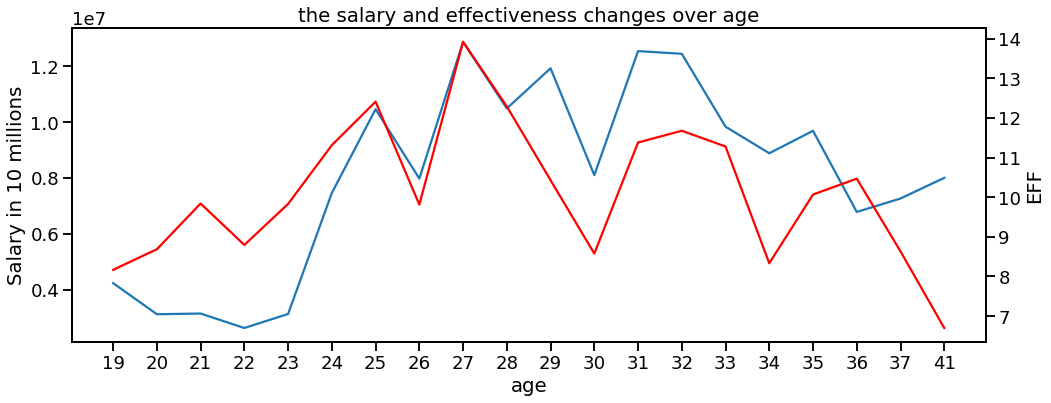

In [158]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(15,6))
sns.lineplot(data=grouped_by_age, x="Age", y="salary")
plt.xlabel("age")
plt.ylabel("Salary in 10 millions")
ax2 = plt.twinx()
sns.lineplot(data=grouped_by_age, x="Age", y="EFF",ax=ax2,color = 'r')
plt.title("the salary and effectiveness changes over age")
plt.tight_layout()
plt.savefig("the_salary_changes_over_age.png",
                    format='png',dpi=150)

#### Q5: How does the age of a player affect their salary and effectiveness?

The graph illustrates the changes in salary and effectiveness of a basketball player according to their age. The red line demonstrates the trend for their effectivenss, and the blue line for their salary. 

In general, it can be seen on the graph that the highest salary and effectivess are reached in the age of 27, when the salary is equal to over 12 millions dollar and the effectiveness is 14 units, while the lowest effectivess is the age of 22, and the lowest salary is the age of 41. In spite of several fluctuations, both salary and effectiveness of a player increase till the age of 27 and then decrease, although the salary then again reaches high point of nearly 12 millions in the age of 31-32, and still both salary and effectiveness drop down in the age of 30. 

Answering to the question, due to many fluctuations the true trend for the effect of age on the salary and effectivenss of a player cannot be detected, although the highest and the lowest point can be determined. Therefore, there is no clear dependence of salary and effectiveness of a player of their age. 